# Creating a Filter, Edge Detection

### Import resources and display image

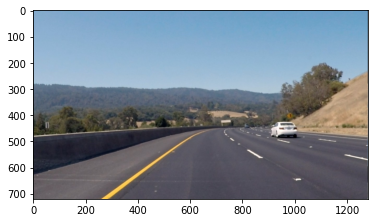

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('images/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

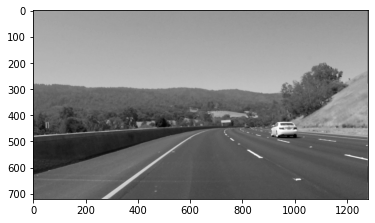

In [25]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

Text(0.5, 1.0, 'Direction of the gradient')

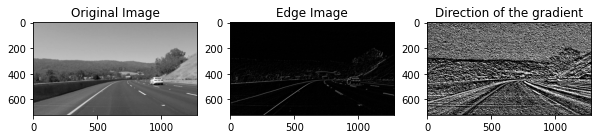

In [26]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y: np.ndarray = np.array([[ -1, -2, -1], 
                                [ 0, 0, 0], 
                                [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x: np.ndarray = np.array([[-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
sobel_grad_x: np.ndarray = cv2.filter2D(src=gray, ddepth=-1, kernel=sobel_x)
sobel_grad_y: np.ndarray = cv2.filter2D(src=gray, ddepth=-1, kernel=sobel_y)

abs_sobel_grad_x: np.ndarray = cv2.convertScaleAbs(sobel_grad_x)
abs_sobel_grad_y: np.ndarray = cv2.convertScaleAbs(sobel_grad_y)

filtered_image: np.ndarray = cv2.addWeighted(src1=abs_sobel_grad_x, alpha=0.5, src2=abs_sobel_grad_y, beta=0.5, gamma=0)

dir_grad: np.ndarray = np.arctan2(sobel_grad_y, sobel_grad_x)

_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax1.imshow(gray, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(filtered_image, cmap='gray')
ax2.set_title('Edge Image')
ax3.imshow(dir_grad, cmap='gray')
ax3.set_title('Direction of the gradient')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



Text(0.5, 1.0, 'Filtered Image')

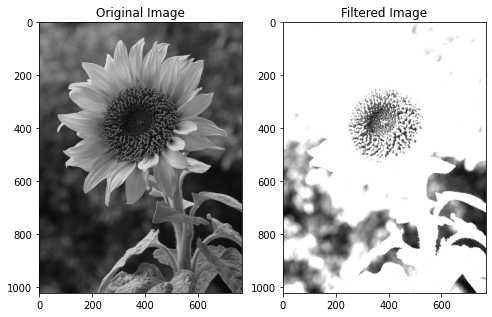

In [27]:
sunflower: np.ndarray = cv2.imread('images/sunflower.jpg', flags=cv2.IMREAD_GRAYSCALE)
kernel: np.ndarray = np.array([[0, 0.1, 0.3, 0.1, 0],
                                [0, 0.3, 0.5, 0.3, 0],
                                [0, 0.5, 0.8, 0.5, 0],
                                [0, 0.3, 0.5, 0.3, 0],
                                [0, 0.1, 0.3, 0.1, 0]])
filtered_image: np.ndarray = cv2.filter2D(src=sunflower, ddepth=-1, kernel=kernel)
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
ax1.imshow(sunflower, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(filtered_image, cmap='gray')
ax2.set_title('Filtered Image')